In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pprint
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline
import ipdb

In [2]:
# karate = nx.karate_club_graph()
##
# from louvain model
nodes = pd.read_csv('Proj_Data/node.csv', index_col=0)
edges = pd.read_csv('Proj_Data/edges_with_qkv.csv', index_col=0)
relation_df = edges[['node1', 'node2', 'q']].copy()
relation = np.array(relation_df)
G = nx.Graph()
G.add_nodes_from(np.array(nodes.index))
G.add_weighted_edges_from(relation)  # add weight from flow

In [3]:
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import quality
from networkx.algorithms.community.centrality import girvan_newman

In [20]:
c = list(girvan_newman(G))
c

KeyboardInterrupt: 

In [6]:
for i in c[2]:
    print(len(i))

385
358
383
174
1
1
1
1


In [10]:
# !! DO NOT MODIFY OR RUN !!
# !!!!!!!!!!!!!!!!!!!!!!!!!!
cd = list(c[2])  

In [28]:
cd[0].__len__()+\
cd[1].__len__()+\
cd[2].__len__()+\
cd[3].__len__()

1300

In [46]:
# construct the partition result dataframe

par_df = pd.DataFrame(index=nodes.index)
par_df['cls'] = ''
for i in range(len(cd)):
    for cls in list(cd[i]):
        par_df.loc[cls, 'cls'] = i
# par_df.to_csv('par_df.csv')

In [47]:
par_df

,cls
0,0
1,1
2,1
3,1
4,1
...,...
1316,3
1317,3
1318,1
1319,1


In [48]:
nodes['cls'] = par_df['cls']

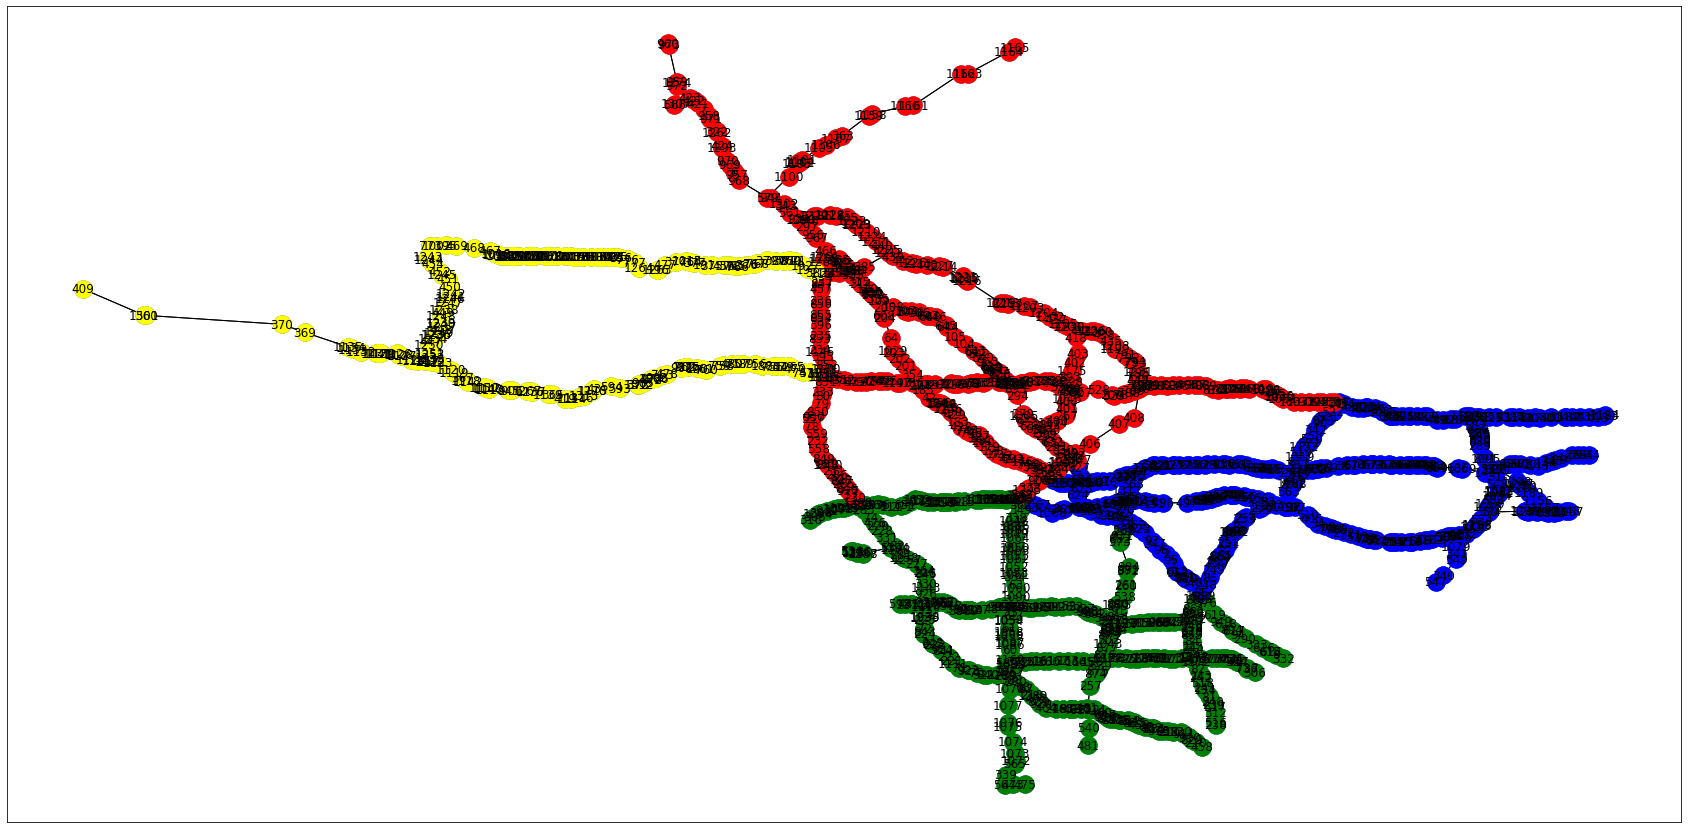

In [49]:
pos = nx.spring_layout(G,scale=0.2)
pos = {}
for i in nodes.index:
    long = nodes.loc[i, 'Long']
    lat = nodes.loc[i, 'Lat']
    
    pos[i] = np.array([long, lat])

plt.figure(figsize=[30,15])
nx.draw_networkx(G,pos)
nx.draw_networkx_nodes(G,pos,nodelist=cd[0],node_color=['green'])
nx.draw_networkx_nodes(G,pos,nodelist=cd[1],node_color=['blue'])
nx.draw_networkx_nodes(G,pos,nodelist=cd[2],node_color=['red'])
nx.draw_networkx_nodes(G,pos,nodelist=cd[3],node_color=['yellow'])
nx.draw_networkx_edges(G,pos)
plt.savefig('./img/k_clique.svg', format='svg')

In [50]:
nodes

,index,ID,q,k,v,Long,Lat,cls
0,0,715898,410.684028,0.090358,62.457812,-118.021787,33.880183,0
1,3,715929,405.503472,0.154721,54.573437,-118.123095,33.971707,1
2,5,715933,383.663194,0.131772,56.324479,-118.130679,33.981839,1
3,6,715938,393.451389,0.137075,54.980208,-118.150997,34.002541,1
4,7,715944,381.265625,0.151283,56.689583,-118.166091,34.013676,1
...,...,...,...,...,...,...,...,...
1316,1863,776457,308.024306,0.048418,68.017014,-118.712596,34.140004,3
1317,1864,776465,252.569444,0.050435,66.585069,-118.865433,34.176675,3
1318,1865,776480,318.086806,0.165058,53.344792,-118.231606,34.053569,1
1319,1866,776487,314.135417,0.066274,64.290278,-117.997784,34.079858,1


In [67]:
a = 1
NSk = 0
#for a in range(4):
for c in range(4):
    NSk += 2*nodes.loc[nodes['cls']==a, 'q'].std()**2/(nodes.loc[nodes['cls']==a, 'q'].std()**2+nodes.loc[nodes['cls']==c, 'q'].std()**2+(nodes.loc[nodes['cls']==a, 'q'].mean()-nodes.loc[nodes['cls']==c, 'q'].mean())**2)
print(NSk/4)

0.8028815321776562


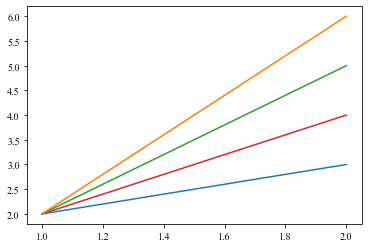

In [63]:
# modified color setting
plt.plot([1,2], [2,3], color=color_set[0])
plt.plot([1,2], [2,4], color=color_set[1])
plt.plot([1,2], [2,5], color=color_set[2])
plt.plot([1,2], [2,6], color=color_set[3])

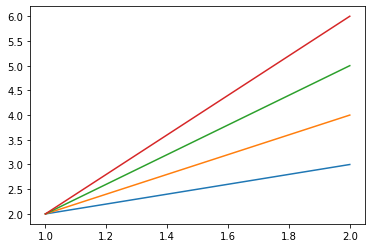

In [52]:
# default color
plt.plot([1,2], [2,3])
plt.plot([1,2], [2,4])
plt.plot([1,2], [2,5])
plt.plot([1,2], [2,6])

In [55]:
# color_set = [ '#2ca02c','#d62728', '#1f77b4', '#ff7f0e','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

There are 4 classes


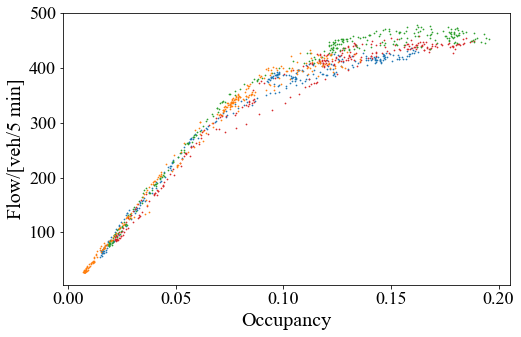

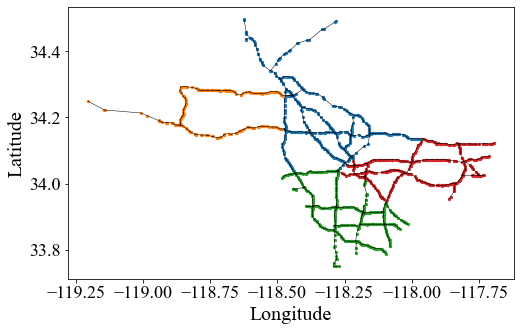

In [60]:
c = 0
c_set = []
color_set = ['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.rcParams['font.family'] = 'Times New Roman'
fig_mfd = plt.figure(figsize=[8,5])
ax_mfd = fig_mfd.add_subplot(111)
fig_net = plt.figure(figsize=[8,5])
ax_net = fig_net.add_subplot(111)

for i in edges.index:
    node1 = edges.loc[i, 'node1']
    node2 = edges.loc[i, 'node2']
    ax_net.plot([nodes.loc[node1, 'Long'], nodes.loc[node2, 'Long']], [nodes.loc[node1, 'Lat'], nodes.loc[node2, 'Lat']], 'black', lw=0.5)

ft = 20
font = {'family': 'Times New Roman',
         'weight': 'normal',
        'size': ft,
        }

for i in [2,1,0,3]:
    data_cls = data_new.loc[data_new['cls']==i].sort_values(by=['ID', 'Time'])
    q_cls = data_cls['q'].values
    if q_cls.reshape(-1, 288).shape[0] <= 1:
        continue
    q_cls_avg = q_cls.reshape(-1, 288).mean(axis=0)
    k_cls = data_cls['Avg k'].values
    k_cls_avg = k_cls.reshape(-1, 288).mean(axis=0)
    ax_mfd.scatter(k_cls_avg, q_cls_avg, s=.5, c=color_set[c])
    ax_mfd.set_xlabel('Occupancy', fontdict=font)
    ax_mfd.set_ylabel('Flow/[veh/5 min]', fontdict=font)
    ax_mfd.tick_params(axis='both', which='major', labelsize=ft*0.9)
    
    lng = nodes.loc[nodes['cls']==i, 'Long']
    lat = nodes.loc[nodes['cls']==i, 'Lat']
    ax_net.scatter(lng, lat, s=5, c=color_set[c])
    ax_net.set_xlabel('Longitude', fontdict=font)
    ax_net.set_ylabel('Latitude', fontdict=font)
    ax_net.tick_params(axis='both', which='major', labelsize=ft*0.9)
    c+=1
    c_set.append(i)
print('There are %i classes'%c)
fig_mfd.savefig('./img/fig_mfd.png', dpi=500)
fig_net.savefig('./img/fig_net.png', dpi=500)

In [54]:
TV = 0
for c in c_set:
    TV += nodes.loc[nodes['cls']==c, 'q'].__len__()*nodes.loc[nodes['cls']==c, 'q'].std()**2
print(TV)

13390352.213706914
